In [1]:
# Example : https://morvanzhou.github.io/tutorials/machine-learning/torch/3-01-regression/

from torch.autograd import Variable
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as activite

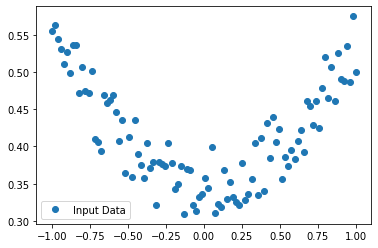

In [2]:
# Step 1. Build Dataset

## choose a seed of random , information : https://segmentfault.com/a/1190000016097466
## This make sure number will be the same with random every times
np.random.seed(0)
torch.manual_seed(0)


## use numpy to build Dataset , according to the seed of random
## Make sure you know the non-linear function : y = wx^2 + ax + b

w = 0.2 ; b = 0.3
x = np.linspace(-1,1,100)
y = w * pow(x,2) + b + np.random.rand(100) * 0.1  # np.random.randn() information : https://www.itread01.com/content/1546341127.html


x = x.reshape(-1,1)
y = y.reshape(-1,1)  # np.reshape() information : https://www.zhihu.com/question/52684594

## view the dataset
plt.plot(x,y,"o",label="Input Data")
plt.legend()
plt.show()

In [3]:
# Step 2. Build Non-Linear Regression Model
class Net(torch.nn.Module):
    def __init__(self,number_feature,number_hidden,number_output):
        super(Net,self).__init__() 
        self.hidden  = torch.nn.Linear(number_feature,number_hidden)  # output of hidden layer
        self.predict = torch.nn.Linear(number_hidden,number_output)   # output of output layer

    def forward(self,feature_input): # This function is in torch.nn.Module 
        activite_value = activite.relu(self.hidden(feature_input))
        output_value = self.predict(activite_value)
        return output_value
    
net = Net( number_feature = 1 , number_hidden = 10 , number_output = 1)
print(*net.parameters())

Parameter containing:
tensor([[-0.0075],
        [ 0.5364],
        [-0.8230],
        [-0.7359],
        [-0.3852],
        [ 0.2682],
        [-0.0198],
        [ 0.7929],
        [-0.0887],
        [ 0.2646]], requires_grad=True) Parameter containing:
tensor([-0.3022, -0.1966, -0.9553, -0.6623, -0.4122,  0.0370,  0.3953,  0.6000,
        -0.6779, -0.4355], requires_grad=True) Parameter containing:
tensor([[ 0.1149,  0.2626, -0.0651,  0.2366, -0.0510,  0.0335,  0.2863, -0.2934,
         -0.1991, -0.0801]], requires_grad=True) Parameter containing:
tensor([-0.1233], requires_grad=True)


epoch : 100 , loss : 0.0014760354533791542


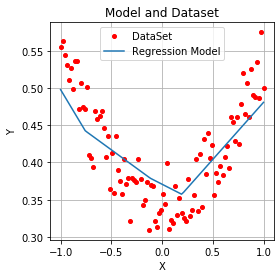

epoch : 200 , loss : 0.0009527697111479938


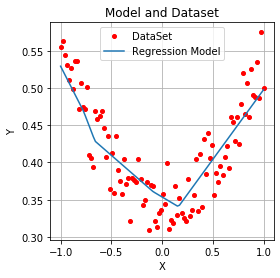

epoch : 300 , loss : 0.0008404640248045325


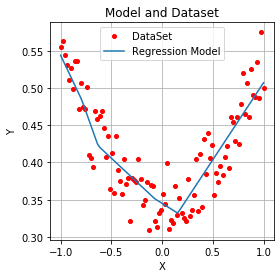

epoch : 400 , loss : 0.0008178879506886005


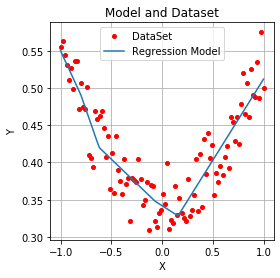

epoch : 500 , loss : 0.000811928475741297


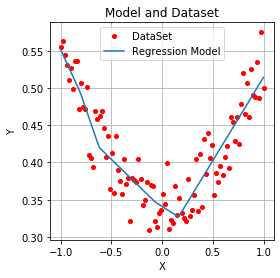

epoch : 600 , loss : 0.000809143646620214


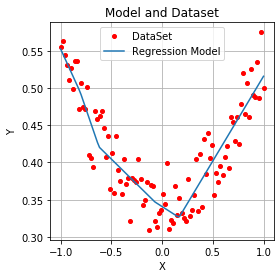

epoch : 700 , loss : 0.0008074921206571162


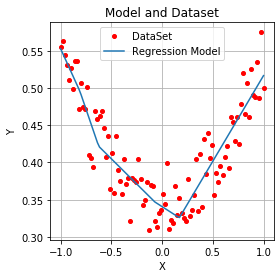

epoch : 800 , loss : 0.0008057677769102156


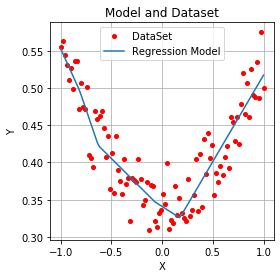

epoch : 900 , loss : 0.0008041205001063645


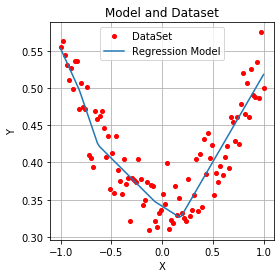

epoch : 1000 , loss : 0.0008031019824557006


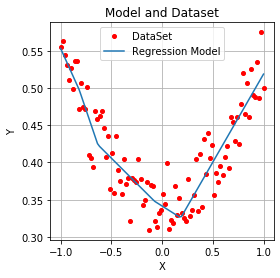

In [4]:
# Step 3. Train Model

## setup optimizer , loss function , parameter
optimizer = torch.optim.SGD(net.parameters() , lr = 0.2 )
loss_function = torch.nn.MSELoss()
number_epochs = 1000
inputs       = Variable(torch.from_numpy(x.astype("float32")  )  )
actual_value = Variable(torch.from_numpy(y.astype("float32")  )  )

for epoch in range(number_epochs):
    prediction = net(inputs)
    loss = loss_function(prediction , actual_value)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (( epoch + 1 ) % 100 == 0):
        print("epoch : {} , loss : {}".format(epoch+1 , loss.data))
        plt.figure(figsize=(4,4))
        plt.title("Model and Dataset")
        plt.xlabel("X") ; plt.ylabel("Y")
        plt.grid()
        plt.plot(x,y,"ro",label="DataSet",marker="o",markersize=4)
        plt.plot(x, prediction.data.numpy() ,  label='Regression Model') # Note : y = ax+b
        plt.legend(); plt.show()

        


In [16]:
    if (epoch + 1) % 100 == 0 :
        plt.cla()
        plt.scatter(x,y)
        plt.plot( inputs , prediction.data.numpy()  , 'r-' , lw = 5 )
        plt.text(0.5 , 0 ," Loss = %.4f" % loss.data.numpy(), fontdict={'size':20 , 'color': 'red'})
        #plt.pause(0.1)